# Лабораторная работа №1

Круглова Виктория 9382

## Загрузка сигнала и построение огибающей кривой

C:\Users\akodu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.
C:\Users\akodu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: WavFileWarning: Incomplete chunk ID: b'\x00', ignoring it.
  after removing the cwd from sys.path.


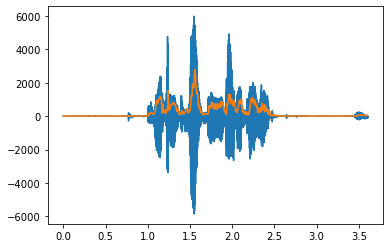

In [11]:
from scipy.io import wavfile
import scipy.io

samplerate, data = wavfile.read("03-01-05-01-01-02-08_A8.wav")

import matplotlib.pyplot as plt
import numpy as np

n = 1000
length = data.shape[0] / samplerate
time = np.linspace(0, length, data.shape[0])
m = int(data.shape[0] / n)
graph = np.linspace(0, length, n)
plot = []
for j in range(n):
    sum = 0
    for k in range(m * j, m * j + m):
        sum += abs(data[k])
    plot.append(sum/m)

f = plt.figure()
plt.plot(time, data)
plt.plot(graph, plot)
plt.show()

## Фильтрация сигнала

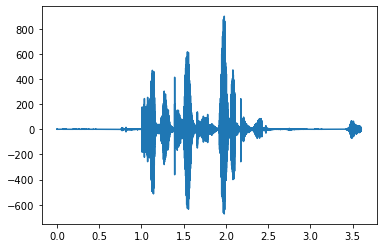

In [15]:
from scipy import signal

fs1 = 2000
fs2 = 3000

wn = [2 * fs1 / samplerate, 2 * fs2 / samplerate]
b, a = signal.butter(1, wn, 'bandpass')
filt_signal = signal.filtfilt(b, a, data)

f = plt.figure()
plt.plot(time, filt_signal)
plt.show()

filt_signal = filt_signal.astype(np.int16)
wavfile.write("filter.wav", samplerate, filt_signal)

## Амплитудный детектор сигнал/шум

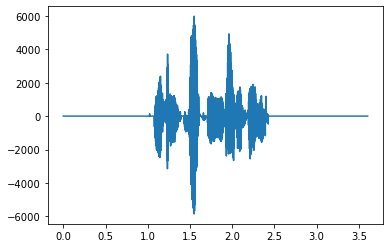

In [17]:
med = 0
for k in range(data.shape[0]):
    med += abs(data[k])
med /= data.shape[0]

a = 0.3
Th = a * med

k = 20
y = np.zeros(data.shape[0])
j = 0
for i in range(data.shape[0]):
    if abs(data[i]) > Th:
        j += 1
        if (j >= 30):
            y[i] = data[i]
    else:
        j = 0
        
        
f = plt.figure()
plt.plot(stime, y)
plt.show()

y = y.astype(np.int16)
wavfile.write("detector.wav", samplerate, y)

## Звуковой эффект "Эхо"

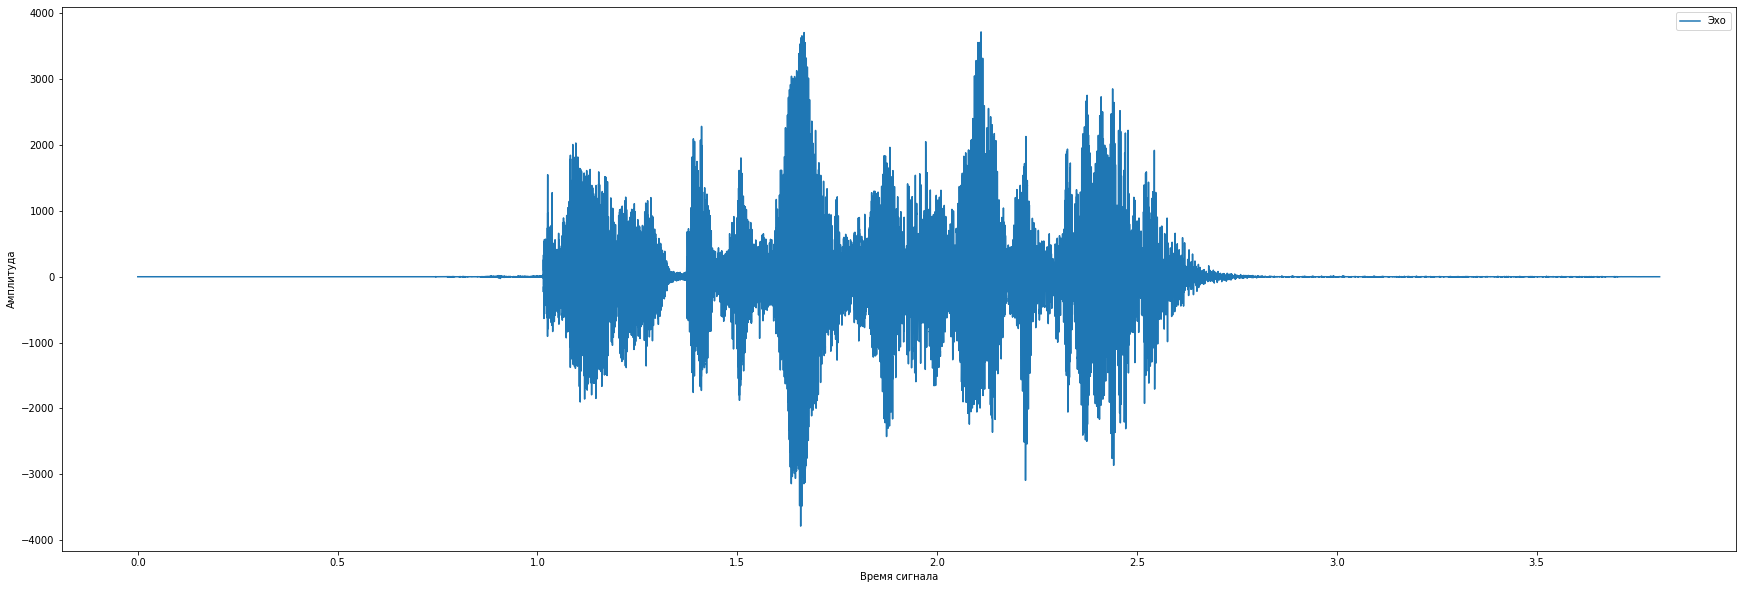

In [51]:
a = [0.9 / (2 ** p) for p in range(7)]
g = 0.5
D = [int(10000 * (2 ** ((1 - i) / 7))) for i in range (1, 7 + 1)]

signals = [[0] * len(sample)] * 7
signals[0] = sample

res = [0] * len(sample)

for i in range(1, 7):
    signals[i][D[i]:] = signals[0][0:(len(sample) - D[i])]
    res = np.add(res, signals[i])

wn = 2 * 10000 / sampleRate
b,a = signal.butter(5, wn,'lowpass')
filtedData = signal.filtfilt(b,a,res)

res = np.add(sample, [x * g for x in filtedData])

wavfile.write("echo.wav", sampleRate, np.array(res).astype(np.int16))

## Звуковой эффект "Distortion"

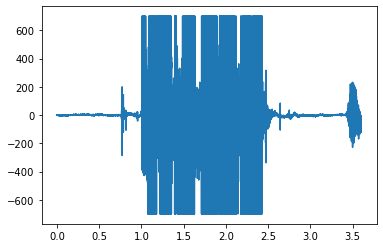

In [20]:
Th = 500
Max = 700
y = []
for i in range(data.shape[0]):
    if abs(data[i]) > Th:
        y.append(Max * np.sign(data[i]))
    else:
        y.append(data[i])

f = plt.figure()
plt.plot(time, y)
plt.show()

y = np.array(y).astype(np.int16)
wavfile.write("distortion.wav", samplerate, y)